In [75]:
'''
Project : web scraper code which extracts product's search result from Amazon.com website

input --> search_text (the product name which is going to be searched in Amazon.com )

output --> a csv file of desc, price, review_rating, review_count  of the desired product

by Morteza Azh

version 001

2023-01-25

'''

# required libraries 

from bs4 import BeautifulSoup
import csv
from selenium import webdriver
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


def url_generator(search_text): 
    
    '''
     Navigating to Amazon's website through generating a URL based on the term which is going to be searched.
     This function will insert the search term using string formatting to the url.
    '''
    
    url_format = 'https://www.amazon.com/s?k={}&crid=3W08ZKWQWWA88&sprefix=%2Caps%2C796&ref=nb_sb_ss_recent_1_0_recent'
    
    # Replacing the spaces in search item with '+' to conform to the URL convention
    
    search_text = search_text.replace(' ', '+')
    url = url_format.format(search_text)
    
    # Adding a place to insert <the page number> using string formatting 
    
    url = url + '&page{}'
    
    return url


def content_extraction(row):
    
    ### Extracting the contents of the page from the HTML
    
    # Exctrating the record header or the description of the product
    
    a_tag = row.h2.a
    
    # The text property of the a tag is the description, we use .strip method to remove the extra space on the edges
    
    desc = a_tag.text.strip()
    
    '''
    The a_tag has the href property which is the url, as it's not a complete URL we need to prepend it with the Amazon 
    webiste URL 
    '''
    
    url = 'https://www.amazon.com' + a_tag.get('href')
    
    #Extracting the price
    
    try:
        price_parent = row.find('span','a-price')
        price = price_parent.find('span','a-offscreen').text
    except AttributeError:
        return
    
        
    # Extracting Reading out of five and number of reviews
    try:
        review_rating = row.i.text
        review_count = row.find('span', {'class': 'a-size-base s-underline-text'}).text
        
    except AttributeError:
        
        review_rating = ''
        review_count =  ''
    
    result = (desc, price,review_rating,review_count,url)
    return result

def main(search_text):
    
    '''
    this function accepts an argument of the search term and then it's going to run the search and save the result as
    csv file
    
    '''
    
    # begin an instance of the web driver

    driver_path = r"C:\\Program Files (x86)\\chromedriver.exe"

    # for chrome:
    
    driver = webdriver.Chrome(driver_path)
    
    
    record = []
    records = []
    
    # generating a URL based on the search text
    
    url = url_generator(search_text)
    
    '''
    Iterating over 20 pages using the query parameter in the URL for page number, any search that  is done in Amazon 
    will result in a maximum of 20 page results this means that we can add this page query to the URL
    using string formatting then we can request the next page until we've extracted from all 20 pages 
    
    '''
    
    for page in range(1,21):
        
        # using the .get method of the driver and passing in the url as the argument
        
        driver.get(url.format(page))
        
        '''
        before extracting the contents of the page from the HTML,we need to make a soup object which will parse the 
        html content from the page source
        
        '''
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        '''
        'data-component-type' is a good option to identfy products records in the page, it's more specific than the class,
         we use the soup object we created previously to extract all elements with a data-component-type of s-search-result
         in div tag
        '''
        
        result = soup.find_all('div' , {'data-component-type': 's-search-result'} )

        # check to see if what is returned from the function is empty or not
        
        for row in result:
            record = content_extraction(row)
            if record:
                records.append(record)
   
    driver.close()
    final = pd.DataFrame(np.array(records))
    return final   

In [126]:
final = main('tablet')

In [127]:
final.head()

,0,1,2,3,4
0,SAMSUNG Galaxy Tab A8 10.5” 32GB Android Table...,$194.99,4.6 out of 5 stars,"(11,416)",https://www.amazon.com/Samsung-Android-Long-La...
1,"Amazon Fire 7 tablet, 7” display, 16 GB, 10 ho...",$74.99,4.5 out of 5 stars,"(6,060)",https://www.amazon.com/Fire-7-Tablet/dp/B09Z9S...
2,"Fire HD 10 Tablet (32 GB, Olive, Lockscreen Ad...",$189.98,4.6 out of 5 stars,"(102,824)",https://www.amazon.com/Tablet-Olive-Lockscreen...
3,Lenovo Tab M10 Plus (3rd Gen) - 2022 - Long Ba...,$189.99,4.1 out of 5 stars,(72),https://www.amazon.com/Lenovo-Tab-M10-Plus-Tab...
4,"All-new Amazon Fire HD 8 tablet, 8” HD Display...",$114.99,4.5 out of 5 stars,"(1,985)",https://www.amazon.com/Amazon-Official-Site-Fi...


In [131]:
final

,desc,price,review_rating,review_count,url
0,SAMSUNG Galaxy Tab A8 10.5” 32GB Android Table...,$194.99,4.6 out of 5 stars,"(11,416)",https://www.amazon.com/Samsung-Android-Long-La...
1,"Amazon Fire 7 tablet, 7” display, 16 GB, 10 ho...",$74.99,4.5 out of 5 stars,"(6,060)",https://www.amazon.com/Fire-7-Tablet/dp/B09Z9S...
2,"Fire HD 10 Tablet (32 GB, Olive, Lockscreen Ad...",$189.98,4.6 out of 5 stars,"(102,824)",https://www.amazon.com/Tablet-Olive-Lockscreen...
3,Lenovo Tab M10 Plus (3rd Gen) - 2022 - Long Ba...,$189.99,4.1 out of 5 stars,(72),https://www.amazon.com/Lenovo-Tab-M10-Plus-Tab...
4,"All-new Amazon Fire HD 8 tablet, 8” HD Display...",$114.99,4.5 out of 5 stars,"(1,985)",https://www.amazon.com/Amazon-Official-Site-Fi...


In [130]:
final = final.drop_duplicates(subset = 'desc')
final

,desc,price,review_rating,review_count,url
0,SAMSUNG Galaxy Tab A8 10.5” 32GB Android Table...,$194.99,4.6 out of 5 stars,"(11,416)",https://www.amazon.com/Samsung-Android-Long-La...
1,"Amazon Fire 7 tablet, 7” display, 16 GB, 10 ho...",$74.99,4.5 out of 5 stars,"(6,060)",https://www.amazon.com/Fire-7-Tablet/dp/B09Z9S...
2,"Fire HD 10 Tablet (32 GB, Olive, Lockscreen Ad...",$189.98,4.6 out of 5 stars,"(102,824)",https://www.amazon.com/Tablet-Olive-Lockscreen...
3,Lenovo Tab M10 Plus (3rd Gen) - 2022 - Long Ba...,$189.99,4.1 out of 5 stars,(72),https://www.amazon.com/Lenovo-Tab-M10-Plus-Tab...
4,"All-new Amazon Fire HD 8 tablet, 8” HD Display...",$114.99,4.5 out of 5 stars,"(1,985)",https://www.amazon.com/Amazon-Official-Site-Fi...


In [132]:
final['price'] = final['price'].str.replace('$', '')
final.head()

C:\Users\ALPHA\AppData\Local\Temp\ipykernel_5684\2593209004.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  final['price'] = final['price'].str.replace('$', '')


,desc,price,review_rating,review_count,url
0,SAMSUNG Galaxy Tab A8 10.5” 32GB Android Table...,194.99,4.6 out of 5 stars,"(11,416)",https://www.amazon.com/Samsung-Android-Long-La...
1,"Amazon Fire 7 tablet, 7” display, 16 GB, 10 ho...",74.99,4.5 out of 5 stars,"(6,060)",https://www.amazon.com/Fire-7-Tablet/dp/B09Z9S...
2,"Fire HD 10 Tablet (32 GB, Olive, Lockscreen Ad...",189.98,4.6 out of 5 stars,"(102,824)",https://www.amazon.com/Tablet-Olive-Lockscreen...
3,Lenovo Tab M10 Plus (3rd Gen) - 2022 - Long Ba...,189.99,4.1 out of 5 stars,(72),https://www.amazon.com/Lenovo-Tab-M10-Plus-Tab...
4,"All-new Amazon Fire HD 8 tablet, 8” HD Display...",114.99,4.5 out of 5 stars,"(1,985)",https://www.amazon.com/Amazon-Official-Site-Fi...


In [133]:
final["price"] = pd.to_numeric(final['price'])
final.head()

,desc,price,review_rating,review_count,url
0,SAMSUNG Galaxy Tab A8 10.5” 32GB Android Table...,194.99,4.6 out of 5 stars,"(11,416)",https://www.amazon.com/Samsung-Android-Long-La...
1,"Amazon Fire 7 tablet, 7” display, 16 GB, 10 ho...",74.99,4.5 out of 5 stars,"(6,060)",https://www.amazon.com/Fire-7-Tablet/dp/B09Z9S...
2,"Fire HD 10 Tablet (32 GB, Olive, Lockscreen Ad...",189.98,4.6 out of 5 stars,"(102,824)",https://www.amazon.com/Tablet-Olive-Lockscreen...
3,Lenovo Tab M10 Plus (3rd Gen) - 2022 - Long Ba...,189.99,4.1 out of 5 stars,(72),https://www.amazon.com/Lenovo-Tab-M10-Plus-Tab...
4,"All-new Amazon Fire HD 8 tablet, 8” HD Display...",114.99,4.5 out of 5 stars,"(1,985)",https://www.amazon.com/Amazon-Official-Site-Fi...


In [134]:
final["price"].mean()

152.988

In [135]:
final["price"].min()

74.99

In [136]:
final["price"].max()

194.99

In [137]:
final['review_rating'] = final['review_rating'].str.rstrip('out of 5 stars')

In [138]:
final["review_rating"] = pd.to_numeric(final['review_rating'])

In [139]:
final

,desc,price,review_rating,review_count,url
0,SAMSUNG Galaxy Tab A8 10.5” 32GB Android Table...,194.99,4.6,"(11,416)",https://www.amazon.com/Samsung-Android-Long-La...
1,"Amazon Fire 7 tablet, 7” display, 16 GB, 10 ho...",74.99,4.0,"(6,060)",https://www.amazon.com/Fire-7-Tablet/dp/B09Z9S...
2,"Fire HD 10 Tablet (32 GB, Olive, Lockscreen Ad...",189.98,4.6,"(102,824)",https://www.amazon.com/Tablet-Olive-Lockscreen...
3,Lenovo Tab M10 Plus (3rd Gen) - 2022 - Long Ba...,189.99,4.1,(72),https://www.amazon.com/Lenovo-Tab-M10-Plus-Tab...
4,"All-new Amazon Fire HD 8 tablet, 8” HD Display...",114.99,4.0,"(1,985)",https://www.amazon.com/Amazon-Official-Site-Fi...


In [141]:
final['review_count'] = final['review_count'].str.replace('(', '')
final['review_count'] = final['review_count'].str.replace(')', '')
final['review_count'] = final['review_count'].str.replace(',', '.')
final

C:\Users\ALPHA\AppData\Local\Temp\ipykernel_5684\3023004188.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  final['review_count'] = final['review_count'].str.replace('(', '')
C:\Users\ALPHA\AppData\Local\Temp\ipykernel_5684\3023004188.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  final['review_count'] = final['review_count'].str.replace(')', '')


,desc,price,review_rating,review_count,url
0,SAMSUNG Galaxy Tab A8 10.5” 32GB Android Table...,194.99,4.6,11.416,https://www.amazon.com/Samsung-Android-Long-La...
1,"Amazon Fire 7 tablet, 7” display, 16 GB, 10 ho...",74.99,4.0,6.060,https://www.amazon.com/Fire-7-Tablet/dp/B09Z9S...
2,"Fire HD 10 Tablet (32 GB, Olive, Lockscreen Ad...",189.98,4.6,102.824,https://www.amazon.com/Tablet-Olive-Lockscreen...
3,Lenovo Tab M10 Plus (3rd Gen) - 2022 - Long Ba...,189.99,4.1,72,https://www.amazon.com/Lenovo-Tab-M10-Plus-Tab...
4,"All-new Amazon Fire HD 8 tablet, 8” HD Display...",114.99,4.0,1.985,https://www.amazon.com/Amazon-Official-Site-Fi...


In [142]:
final["review_count"] = pd.to_numeric(final['review_count'])

In [143]:
final

,desc,price,review_rating,review_count,url
0,SAMSUNG Galaxy Tab A8 10.5” 32GB Android Table...,194.99,4.6,11.416,https://www.amazon.com/Samsung-Android-Long-La...
1,"Amazon Fire 7 tablet, 7” display, 16 GB, 10 ho...",74.99,4.0,6.060,https://www.amazon.com/Fire-7-Tablet/dp/B09Z9S...
2,"Fire HD 10 Tablet (32 GB, Olive, Lockscreen Ad...",189.98,4.6,102.824,https://www.amazon.com/Tablet-Olive-Lockscreen...
3,Lenovo Tab M10 Plus (3rd Gen) - 2022 - Long Ba...,189.99,4.1,72.000,https://www.amazon.com/Lenovo-Tab-M10-Plus-Tab...
4,"All-new Amazon Fire HD 8 tablet, 8” HD Display...",114.99,4.0,1.985,https://www.amazon.com/Amazon-Official-Site-Fi...


In [144]:
from matplotlib import pyplot as plt

In [149]:
final.iloc[0,0]

'SAMSUNG Galaxy Tab A8 10.5” 32GB Android Tablet w/ LCD Screen, Long Lasting Battery, Kids Content, Smart Switch, Expandable Memory, US Version, Silver, Amazon Exclusive'

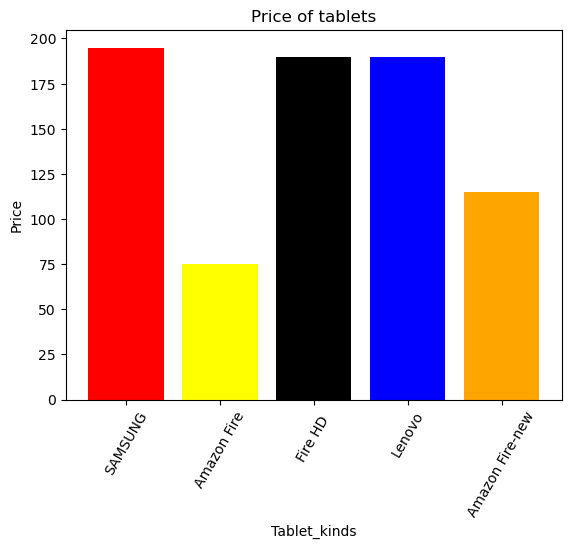

In [170]:
desc_list= ['SAMSUNG' ,'Amazon Fire', 'Fire HD ','Lenovo','Amazon Fire-new']
c = ['red', 'yellow', 'black', 'blue', 'orange']
plt.bar(desc_list, final.price, color = c)
plt.xticks(rotation=60)
plt.title('Price of tablets')
plt.xlabel('Tablet_kinds')
plt.ylabel('Price')
plt.show()

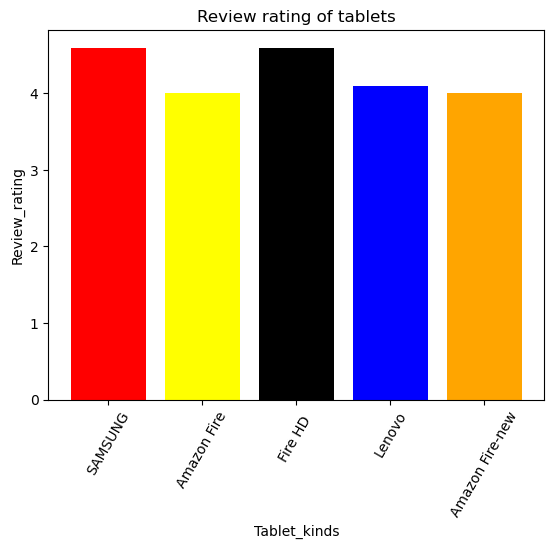

In [171]:
desc_list= ['SAMSUNG' ,'Amazon Fire', 'Fire HD ','Lenovo','Amazon Fire-new']
c = ['red', 'yellow', 'black', 'blue', 'orange']
plt.bar(desc_list, final.review_rating, color = c)
plt.xticks(rotation=60)
plt.title('Review rating of tablets')
plt.xlabel('Tablet_kinds')
plt.ylabel('Review_rating')
plt.show()

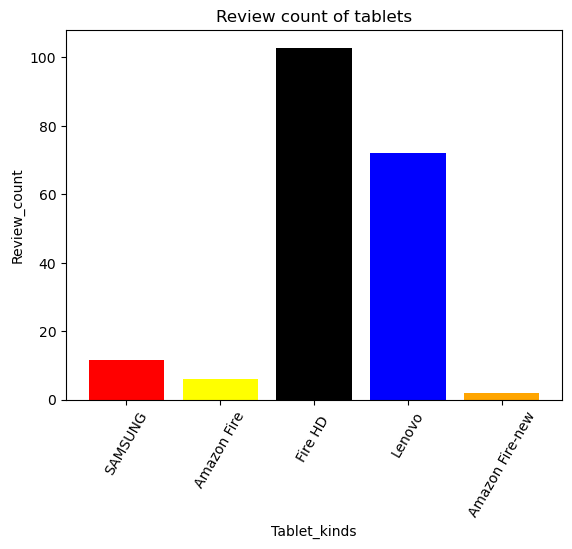

In [172]:
desc_list= ['SAMSUNG' ,'Amazon Fire', 'Fire HD ','Lenovo','Amazon Fire-new']
c = ['red', 'yellow', 'black', 'blue', 'orange']
plt.bar(desc_list, final.review_count, color = c)
plt.xticks(rotation=60)
plt.title('Review count of tablets')
plt.xlabel('Tablet_kinds')
plt.ylabel('Review_count')
plt.show()